In [2]:
import pandas as pd
import numpy as np

In [ ]:
minwan_data = pd.read_excel(r'C:\Users\jhee\Documents\StudyFolder\Project_DongpaBangjiP\current_data\request\request_info.xlsx')
minwan_data.head(10)

In [19]:
minwan_data['classification'].value_counts()

동파             5020
계량기기타          1475
밸브고장             34
계량기고장(지침부동)      23
계량기이설            17
계량기뚜껑신청           7
계량기고장(회전불량)       2
노후교체              2
계량기불량             1
Name: mid_class, dtype: int64

In [21]:
minwan_data['state'].value_counts()

완료    6362
반려     217
접수       2
Name: stcd, dtype: int64

In [23]:
minwan_data['mid_class'].value_counts()

동파             5020
계량기기타          1475
밸브고장             34
계량기고장(지침부동)      23
계량기이설            17
계량기뚜껑신청           7
계량기고장(회전불량)       2
노후교체              2
계량기불량             1
Name: mid_class, dtype: int64

In [12]:
minwan_data['date'][0]

'2017-06-15 10:49'

In [60]:
dates = [ minwan_data['date'][i].split(' ')[0].split('-') for i in range(len(minwan_data['date']))  ]
year=[i[0] for i in dates]
month=[i[1] for i in dates]
day=[i[2] for i in dates]

for i in set(year):
    print(i, year.count(i))
print('---------------')
for i in set(month):
    print(i, month.count(i))

2015 282
2012 1146
2013 1026
2014 405
2010 1233
2011 1522
2017 243
2016 724
---------------
05 288
08 123
02 1379
09 107
06 195
11 224
04 548
01 1896
07 109
03 1001
10 123
12 588


['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] [1233, 1522, 1146, 1026, 405, 282, 724, 243]


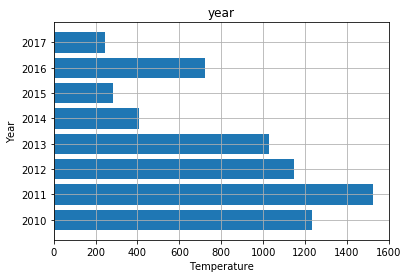

In [64]:
import matplotlib.pyplot as plt

def barchart(data, labels): 
    num_bars = len(data) 
    positions = range(1, num_bars + 1) 
    plt.barh(positions, data, align='center') 
    plt.yticks(positions, labels) 
    plt.xlabel('Temperature') 
    plt.ylabel('Year') 
    plt.title('year') 
    plt.grid()
    plt.show() 

x = list(set(year))
x.sort()
y = [int(year.count(i)) for i in x]
print(x,y)
barchart(y, x)

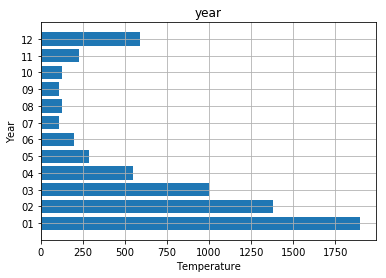

In [65]:
x = list(set(month))
x.sort()
y = [int(month.count(i)) for i in x]
barchart(y, x)

In [4]:
stateEnd_data = minwan_data[minwan_data['state']=='완료']
print(stateEnd_data.shape[0])

6362


In [ ]:
for i in stateEnd_data.index:
    if '재인입' in str(stateEnd_data.loc[i,'content']) :
        stateEnd_data=stateEnd_data.drop(i)

stateEnd_data.shape[0]

In [5]:
from konlpy.tag import Twitter
twitter = Twitter()
for i in stateEnd_data.index:
    stateEnd_data.loc[i,'content']=str(stateEnd_data.loc[i,'content']).replace("/",' ')

stateEnd_data['nouns'] = ''

for i in stateEnd_data.index:
    stateEnd_data.loc[i,'nouns']=twitter.nouns(stateEnd_data.loc[i,'content'])
    

C:\Users\jhee\Documents\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\jhee\Documents\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jhee\Documents\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jhee\Documen

In [6]:
stateEnd_data['nouns'].head()

0                   [계량기, 지침, 앞, 수가, 현장, 확인]
2                                   [동파, 문의]
4                                  [계량기, 동파]
5    [매매, 현, 소유, 주, 겨울, 계량기, 동파, 유리, 확인, 요청]
7            [계량기, 메모, 계량기, 동파, 관리사, 통화, 요청]
Name: nouns, dtype: object

In [6]:
stateEnd_data['dongpaxo'] = ''

In [8]:
s=0
for i in stateEnd_data.index:
    temp = stateEnd_data.loc[i,'nouns']
    if '동파' in temp and len(temp)==1:
        stateEnd_data.loc[i,'dongpaxo'] = 0
        s+=1

C:\Users\jhee\Documents\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jhee\Documents\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
s

409

In [8]:
stateEnd_data['dongpaxo'].value_counts()

     5657
0     409
Name: dongpaxo, dtype: int64

In [9]:
stateEnd_data['nouns'].head(10)

0                              [계량기, 지침, 앞, 수가, 현장, 확인]
2                                              [동파, 문의]
4                                             [계량기, 동파]
5               [매매, 현, 소유, 주, 겨울, 계량기, 동파, 유리, 확인, 요청]
7                       [계량기, 메모, 계량기, 동파, 관리사, 통화, 요청]
8                                     [계량기, 동파, 교체, 요청]
9                                     [계량기, 동파, 교체, 요청]
10                                    [계량기, 동파, 교체, 요청]
11                                         [동파, 접수, 요청]
12    [계량기, 유리, 밸브, 자동, 확인, 요청, 동파, 확인, 시, 계량기, 교체, ...
Name: nouns, dtype: object

In [10]:
for i in stateEnd_data.index:
    temp = stateEnd_data.loc[i,'nouns']
    if '동파' in temp and '계량기' in temp:
        if '교체' in temp and '요청' in temp:
            stateEnd_data.loc[i,'dongpaxo'] = 0
        elif '교체' in temp:
        stateEnd_data.loc[i,'dongpaxo'] = 0
    elif '동파' in temp and '교체' in temp:
        stateEnd_data.loc[i,'dongpaxo'] = 0

In [11]:
stateEnd_data['dongpaxo'].value_counts()

0    3807
     2259
Name: dongpaxo, dtype: int64

In [12]:
# for i in stateEnd_data.index:
#     temp=stateEnd_data.loc[i,'nouns']
#     if '동파' in temp:
#         if '계량기' or '교체' in temp:
#              stateEnd_data.loc[i,'dongpaxo']=0

In [12]:
stateEnd_data['dongpaxo'].value_counts()

0    3807
     2259
Name: dongpaxo, dtype: int64

In [14]:
# mola=stateEnd_data[stateEnd_data['dongpaxo']!=0]

In [13]:
for i in stateEnd_data.index:
    temp=stateEnd_data.loc[i,'nouns']
    if '동파' in temp:
        if '유리' and '파손' in temp:
             stateEnd_data.loc[i,'dongpaxo']=0

In [16]:
stateEnd_data['dongpaxo'].value_counts()

0    3892
     2174
Name: dongpaxo, dtype: int64

In [14]:
for i in stateEnd_data.index:
    temp=stateEnd_data.loc[i,'nouns']
    if '동파' in temp:
        if '계량기' and '신고' in temp:
             stateEnd_data.loc[i,'dongpaxo']=0

In [15]:
stateEnd_data['dongpaxo'].value_counts()

0    3956
     2110
Name: dongpaxo, dtype: int64

In [19]:
# writer = pd.ExcelWriter('output.xlsx')
# stateEnd_data.to_excel(writer,'Sheet1')
# writer.save()

In [ ]:
stateEnd_data[stateEnd_data['consumer_id']=='41480-09-15383']

In [16]:
minwon_jisu = pd.read_excel(r'C:\Users\jhee\Documents\StudyFolder\Project_DongpaBangjiP\request_jisu.xlsx')
minwon_jisu.head()

,신청일시,중분류,수용가번호,상태,민원내용,check,Unnamed: 6
0,2017-06-15 10:49,계량기고장(회전불량),41480-16-03444,완료,계량기지침 앞자리수가 딸려 올려가 있음 / 현장확인요청함,2,NaN
1,2017-06-13 14:44,계량기기타,41480-12-01908,반려,계량기 유리 안으로 물 고임/ 그대로 유지해도 괜찮은 것인지 확인 요청( 겨울철 동...,2,NaN
2,2017-06-12 13:27,계량기기타,NaN,완료,동파로문의,2,NaN
3,2017-06-09 14:04,계량기기타,41480-09-26820,접수,계량기가 외부와 가까이 노출되어 겨울이면 동파된다고함 보호통 교체 요청,2,NaN
4,2017-06-08 15:24,계량기기타,41480-11-03416,완료,.계량기 동파라고 합니다,0,NaN


In [17]:
print(minwon_jisu.shape[0])
stateEnd_jisu = minwon_jisu[minwon_jisu['상태']=='완료']
print(stateEnd_jisu.shape[0])

stateEnd_jisu.shape[0]

1458
1365


1365

In [ ]:
#stateEnd_jisu['신청일시']=='2017-04-11 11:48'
stateEnd_data[stateEnd_data['date']=='2017-04-11 11:47']
#stateEnd_data['date']==stateEnd_jisu['신청일시'][i] and stateEnd_data['consumer_id']==stateEnd_jisu['수용가번호'][i]

In [ ]:
temp_data=stateEnd_data[stateEnd_data['date']==stateEnd_jisu['신청일시'][44]] 
print(temp_data)
temp_data[temp_data['consumer_id']==stateEnd_jisu['수용가번호'][44]]

In [ ]:
stateEnd_data['req_jisu']=''
for i in stateEnd_jisu.index:
    temp_data=stateEnd_data[stateEnd_data['date']==stateEnd_jisu['신청일시'][i]] 
    idx = temp_data[temp_data['consumer_id']==stateEnd_jisu['수용가번호'][i]].index
    stateEnd_data['req_jisu'][idx]=stateEnd_jisu['check'][i]
stateEnd_data.head()

In [21]:
minwon_jiw = pd.read_excel(r'C:\Users\jhee\Documents\StudyFolder\Project_DongpaBangjiP\request_jiw.xlsx')
minwon_jiw.head()

,신청일시,중분류,수용가번호,상태,민원내용,check
0,2012-05-04 11:13,동파,41480-11-03325,완료,계량기 동파되었다함 / 연락후 방문요청,0.0
1,2012-05-04 09:05,동파,41480-09-04091,완료,계량기 동파되었다함,0.0
2,2012-05-03 15:48,동파,NaN,완료,"위 민원인연락처이며, 파주시청 동파신고 ( 신규준공 다음날 나오는가옥으로 먼저 ...",0.0
3,2012-05-03 14:40,동파,41480-09-06938,완료,동파,0.0
4,2012-05-03 14:38,동파,41480-09-06937,완료,동파교체,0.0


In [22]:
minwon_jiw.shape[0]

1114

In [ ]:
stateEnd_data['req_jiw']=''
for i in minwon_jiw.index:
    temp_data=stateEnd_data[stateEnd_data['date']==minwon_jiw['신청일시'][i]] 
    idx = temp_data[temp_data['consumer_id']==minwon_jiw['수용가번호'][i]].index
    stateEnd_data['req_jisu'][idx]=minwon_jiw['check'][i]
stateEnd_data.head()

In [24]:
writer = pd.ExcelWriter('output.xlsx')
stateEnd_data.to_excel(writer,'Sheet2')
writer.save()

In [70]:
dongpa = pd.read_excel(r'C:\Users\jhee\Documents\StudyFolder\Project_DongpaBangjiP\export_not_yellow.xlsx')
dongpa.head()

,content,count,per,Unnamed: 3
1,동파,368,0.061870,1950.0
2,계량기 동파,216,0.036315,493.0
3,교체요청,115,0.019334,NaN
4,계량기동파신고,108,0.018157,NaN
5,계량기동파,48,0.008070,NaN


In [72]:
#print(dongpa['content'])
# print(stateEnd_data['content']=='동파')
# print(stateEnd_data['content'][17])
# a = dongpa['content'].tolist()

# if stateEnd_data['content'][17] in a:
#     print('----')
s = 0
for i in stateEnd_data.index:
    if stateEnd_data['content'][i] in dongpa['content'].tolist():
        s+=1
print(s)
print(sum(dongpa['count']))

1457
1952


In [ ]:
stateEnd_data['notYellow'] = ''
